In [1]:
from __future__ import division
import cv2
from matplotlib import pyplot as plt
import numpy as np
from math import cos,sin

In [25]:
green = (0,255,0)

In [4]:
def show(image):
    #fig size in inches
    plt.figure(figsize=(10,10))
    plt.imshow(image, interpolation='nearest')

In [15]:
def overlay_mask(mask, image):
    #make the mask rgb
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask,0.5,image,0.5,0)
    return img

In [13]:
def find_biggest_contour(image):
    #copy of th eimage
    image = image.copy()
    contours, heirarchy = cv2.findContours(image, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE) #retr_list gives contour segements that compresses the horizontal,vertical,diagonal segments and leaves the n points. 
    #heirarchy is for highest to lowest contour list

    #isolating the las=rgest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x:[0])[1]

    mask = np.zeros(image.shape,np.uint8)
    cv2.drawContours(mask, [biggest_contour],-1,255,-1)

    return biggest_contour,mask

In [23]:
def circle_contour(image,contour):
    #bounding ellipse
    image_with_ellipse = image.copy()
    ellipse = cv2.fitEllipse(contour)
    #add it
    cv2.ellipse(image_with_ellipse,ellipse,green, 2, cv2.LINE_AA)
    return image_with_ellipse

In [8]:
def find_strawberries(image):
    #step 1
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #step 2
    max_dimension = max(image.shape)
    scale = 700/max_dimension
    image = cv2.resize(image, None, fx=scale, fy=scale)
    #step 3
    imag_blur = cv2.GaussianBlur(image, (7,7), 0) #(input = image, (7,7) = how much we want to blur i.e.(700,700) and 0 is for how much we want to filter it out)
    imag_blur_hsv = cv2.cvtColor(imag_blur, cv2.COLOR_RGB2HSV)  #separates the image intensity(brightness) from the actual image colour 
    #step 4
    #filter by color
    min_red = np.array([0,100,80])
    max_red = np.array([18,256,256])
    mask1 = cv2.inRange(imag_blur_hsv,min_red,max_red)
    #filter by brightness
    min_red2 = np.array([170,100,80])
    max_red2 = np.array([186,256,256])
    mask2 = cv2.inRange(imag_blur_hsv, min_red2,max_red2)

    #take these two masks and...
    #combine masks
    mask = mask1+mask2

    #step 5
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
    mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask_clean = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN,kernel)

    #step 6
    big_strawberry_contour, mask_starwberry = find_biggest_contour(mask_clean)

    #step 7
    overlay = overlay_mask(mask_clean,image)

    #step 8
    circled = circle_contour(overlay, big_strawberry_contour)
    show(circled)

    #step 9
    bgr = cv2.cvtColor(circled, cv2.COLOR_RGB2BGR)

    return bgr

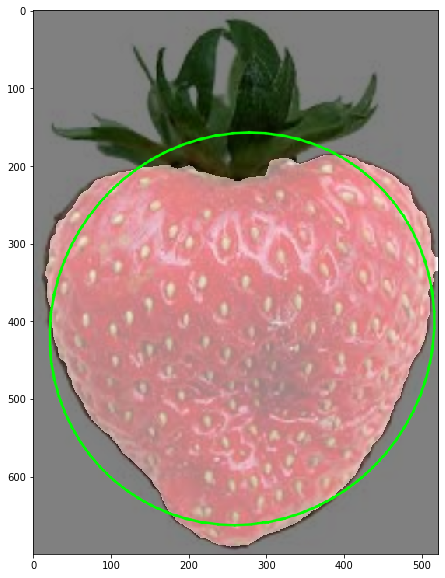

In [38]:
#read the image
image = cv2.imread('strawberry.jpg')
result = find_strawberries(image)
#write the image
#cv2.imwrite('strawberry2.jpg', result)